# Convolutional Neural Network
## The CIFAR-10 dataset

### Juan Fernando González
20170085

## Libraries

In [22]:
import keras
from keras.utils import plot_model
from keras.datasets import cifar10
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.metrics import confusion_matrix
import joblib
import os

import numpy as np
import matplotlib.pyplot as plt
import pydot 

%matplotlib inline

## Load Data

In [2]:
# The data, split between train and test sets:

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## Initial Exploration

Let's see the shapes of the train and test data.

In [3]:
print('X Train data shape: ', X_train.shape)
print('X Test data shape: ', X_test.shape)
print('Y Train data shape: ', y_train.shape)
print('Y Test data shape: ', y_test.shape)

X Train data shape:  (50000, 32, 32, 3)
X Test data shape:  (10000, 32, 32, 3)
Y Train data shape:  (50000, 1)
Y Test data shape:  (10000, 1)


In total there are 60000 features.

Ther are 10 different classes to be classified in this dataset:
    
1. Airplane ✈️
2. Automobile 🚗
3. Bird 🦜
4. Cat 🐱
5. Deer 🦌
6. Dog 🐶
7. Frog 🐸
8. Horse 🐴
9. Ship 🛥
10. Truck 🚚

In [4]:
classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

#### Example of an image display

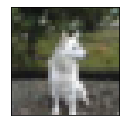

Class: Dog


In [5]:
i = 750
fig,ax=plt.subplots(figsize=(2,2))
ax.set_xticks([])
ax.set_yticks([])
ax.grid(False)
ax.imshow(X_train[i])
plt.show()
print("Class: {}".format(classes[int(y_train[i])]))

### Normalize data

Let's scale the features (pixels) to 0 - 1 and convert the type to float for computational performance.

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

#### One Hot Encoding 

In [7]:
# Convert class vectors to binary class matrices.

y_train = keras.utils.to_categorical(y_train, len(classes))
y_test = keras.utils.to_categorical(y_test, len(classes))

## CNN Architecture

In [25]:
# Define the CNN 

CNN = Sequential(name='Cool CNN No. 3')

### Convlolutional layers

In [26]:
#convlolutional layers

CNN.add(Conv2D(32, kernel_size=(3,3), input_shape=(X_train.shape[1:]), activation='relu'))
CNN.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
CNN.add(MaxPooling2D(pool_size=(2,2)))

CNN.add(Dropout(0.25))

CNN.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
CNN.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
CNN.add(MaxPooling2D(pool_size=(2,2)))

CNN.add(Dropout(0.25))

### Dense layers

In [27]:
CNN.add(Flatten())

CNN.add(Dense(256, activation='relu'))
CNN.add(Dropout(0.3))

CNN.add(Dense(len(classes), activation='softmax'))

### Compile the Model

In [28]:
# Compile the model

CNN.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(CNN.summary())
print('\n\t -------------------- Compiled! --------------------')

Model: "Cool CNN No. 3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)       

## Open Model (If there is any)

In [8]:
# load the model from disk
filenames = 'finalized_model.sav'
#(Un-comment this lines to open existing model)

#CNN = joblib.load(filenames)
#loss, test_a = CNN.evaluate(X_test, y_test)
#print('\nTest accuracy:', test_a)

10000/10000 [==============================] - 6s 643us/step

Test accuracy: 0.8019999861717224


## Training the Model

In [12]:
model_history = CNN.fit(X_train, y_train,
                          batch_size = 32,
                          epochs = 100,
                          validation_data=(X_test, y_test),
                          shuffle=True, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 181s 4ms/step - loss: 2.1099 - accuracy: 0.2129 - val_loss: 1.7884 - val_accuracy: 0.3575
Epoch 2/100
50000/50000 [==============================] - 181s 4ms/step - loss: 1.7529 - accuracy: 0.3579 - val_loss: 1.5942 - val_accuracy: 0.4177
Epoch 3/100
50000/50000 [==============================] - 181s 4ms/step - loss: 1.5835 - accuracy: 0.4208 - val_loss: 1.4295 - val_accuracy: 0.4817
Epoch 4/100
50000/50000 [==============================] - 192s 4ms/step - loss: 1.4414 - accuracy: 0.4753 - val_loss: 1.3430 - val_accuracy: 0.5121
Epoch 5/100
50000/50000 [==============================] - 199s 4ms/step - loss: 1.3630 - accuracy: 0.5097 - val_loss: 1.2556 - val_accuracy: 0.5542
Epoch 6/100
50000/50000 [==============================] - 199s 4ms/step - loss: 1.2933 - accuracy: 0.5380 - val_loss: 1.2559 - val_accuracy: 0.5501
Epoch 7/100
50000/50000 [==============================]

## Analize training history and results

In [13]:
def plot_hist(model_history):
    fix,axs=plt.subplots(2,1,figsize=(20,8))
    ax1 = axs[0]
    ax1.plot(model_history.history['accuracy'])
    ax1.plot(model_history.history['val_accuracy'],c='g')
    ax1.set_title('Model accuracy',fontsize=16)
    ax1.set_ylabel('Accuracy',fontsize=8)
    ax1.set_xlabel('Epoch',fontsize=8)
    ax1.grid(alpha=0.3)
    ax1.legend(['Train', 'Test'], loc='upper left')


    # # summarize history for loss
    ax2 = axs[1]
    ax2.plot(model_history.history['loss'],c='r')
    ax2.plot(model_history.history['val_loss'],c='orange')
    ax2.set_title('Model loss',fontsize=16)
    ax2.set_ylabel('Accuracy',fontsize=8)
    ax2.set_xlabel('Epoch',fontsize=8)
    ax2.grid(alpha=0.3)
    ax2.legend(['train', 'test'], loc='upper right')
    plt.show()

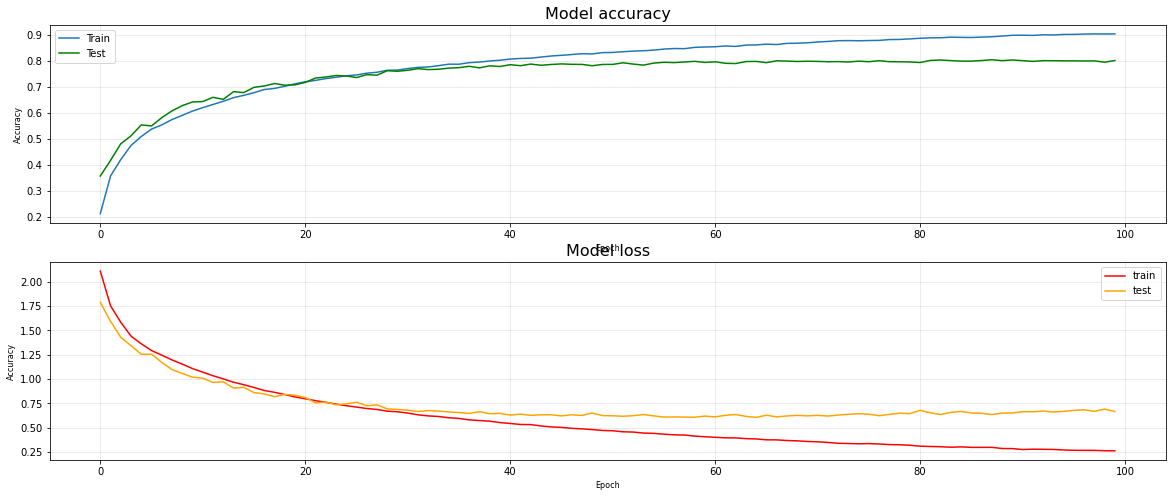

In [14]:
plot_hist(model_history)

In [9]:
test_loss, test_acc = CNN.evaluate(X_test, y_test)

print('\nTest accuracy:', test_acc)
print('Test loss:    ', test_loss)

10000/10000 [==============================] - 7s 673us/step

Test accuracy: 0.8019999861717224
Test loss:     0.6679006222009659


We got a 0.80 score of test accuracy with 100 epochs, it's good, but it can improve.

In [10]:
# Make prediction.

pred = CNN.predict(X_test)

Make the predictions with the test features.

## Display and check predictions

In [11]:
# Convert predictions classes to one hot vectors 

Y_pred_classes = np.argmax(pred, axis=1) 

# Convert validation observations to one hot vectors

Y_true = np.argmax(y_test, axis=1)

In [12]:
# Errors are difference between predicted labels of our model and true labels of the dataset

errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = X_test[errors]

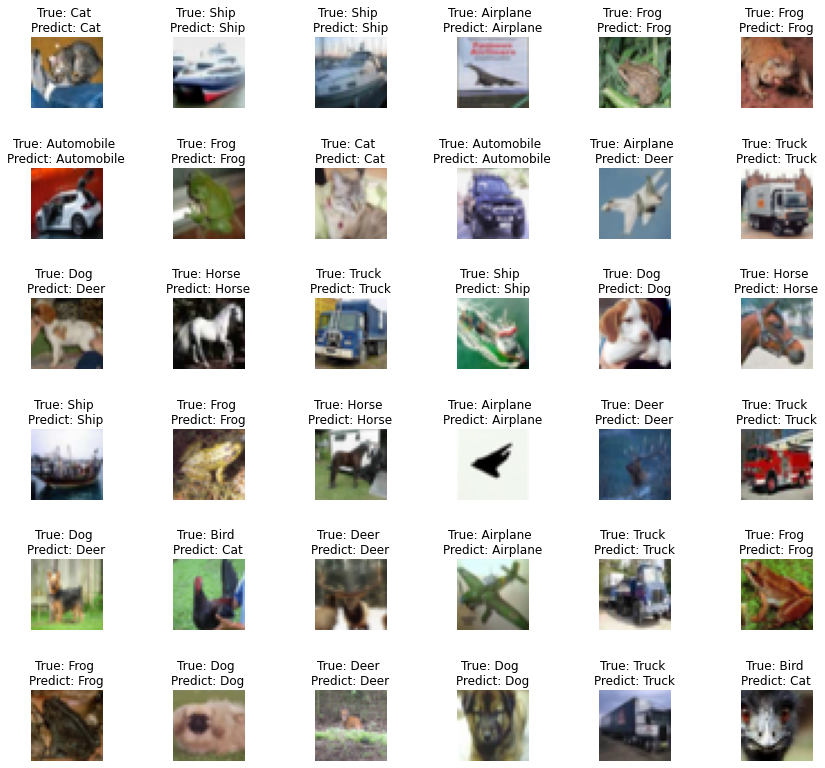

In [13]:
# Row
x = 6
# Column
y = 6

fig, axes = plt.subplots(x, y, figsize=(14,14))
axes = axes.ravel()

for i in np.arange(0, x*y):
    axes[i].imshow(X_test[i]) # Display the image of the X_test data
    axes[i].set_title("True: %s \nPredict: %s" % (classes[Y_true[i]], classes[Y_pred_classes[i]])) #Display the True and the pred class
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

## Display just one Test true vs predicted value and image

In [14]:
def show_test(number):
    fig = plt.figure(figsize = (3,3))
    test_image = np.expand_dims(X_test[number], axis=0)
    test_result = CNN.predict_classes(test_image)
    plt.imshow(X_test[number])
    dict_key = test_result[0]
    plt.title("Predicted: {} \nTrue Label: {}".format(classes[dict_key],
                                                      classes[Y_true[number]]))

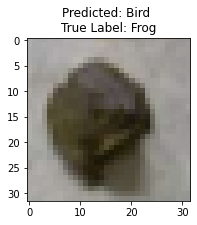

In [15]:
show_test(570)

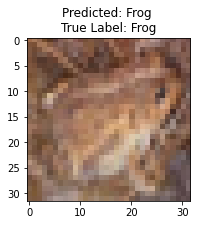

In [16]:
show_test(777)

### Confusion Matrix

In [17]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    
    return im, cbar

In [18]:
def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts


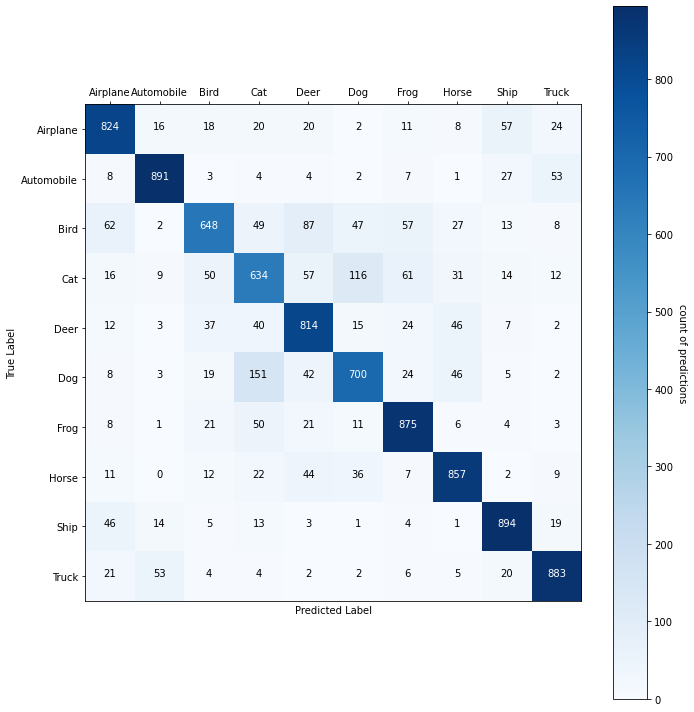

In [25]:
cm = confusion_matrix(Y_true, Y_pred_classes) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(10,10))
im, cbar = heatmap(cm, classes, classes, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

## Visualize filter weights and Feature maps

In [17]:
# extract only convolutional layers of our trainned network

conv2d_layers = []

for i, layer in enumerate(CNN.layers):
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    filters, biases = layer.get_weights()
    conv2d_layers.append(i)
    
    print("{0:<10}: {1}".format(layer.name, filters.shape))

conv2d_1  : (3, 3, 3, 32)
conv2d_2  : (3, 3, 32, 32)
conv2d_3  : (3, 3, 32, 64)
conv2d_4  : (3, 3, 64, 64)


In [18]:
# extrat the weights of the convolutional layers

conv2d_layers_weights = []

for i in conv2d_layers:
    filters, biases = CNN.layers[i].get_weights()
    # Normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    conv2d_layers_weights.append(filters)

In [19]:
print('Total Conv. Layers: ',len(conv2d_layers_weights))

Total Conv. Layers:  4


In [20]:
# this simple CNN has 4 convolutional layers
# for simplicity we asign them to a variable
conv2d_1 = conv2d_layers_weights[0]
conv2d_2 = conv2d_layers_weights[1]
conv2d_3 = conv2d_layers_weights[2]
conv2d_4 = conv2d_layers_weights[3]

## Plot filters for first layer

In [21]:
conv2d_1.shape

(3, 3, 3, 32)

Shape of each Conv. Layer is structured in this way:

1. conv2d_layer[0] = Width 
2. conv2d_layer[1] = Height
3. conv2d_layer[2] = Depth
4. conv2d_layer[3] = Number of filters

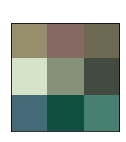

In [22]:
# plot a single filter

filter_id = 17 # (0 - 31)
filter_to_plot =  conv2d_1[:,:,:,filter_id] # Just get the number of the filter  
fig, ax = plt.subplots(1,1,figsize=(2,2))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(filter_to_plot)
ax.set_title('Filter {0}'.format(filter_id),c='w')
plt.show()

In [23]:
width, height, depth, n_filters = conv2d_1.shape

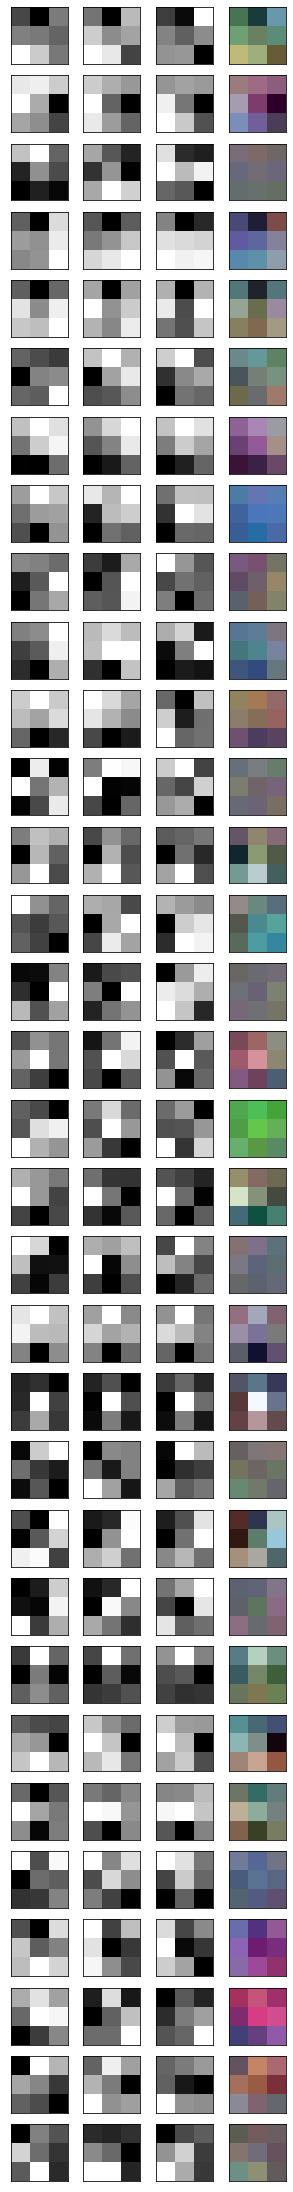

In [24]:
# Plot 32 filters: 3 9x9 channels and combined RGB view 
# Note:
# Combined RGB view only make sense when the depth is 3 (interpreted as RGB) 
# above 3 it doues not make sense to plot all the layers into one image

fig,axs=plt.subplots(n_filters, depth+1,figsize=(5,40))
for i in range(n_filters):
    for j in range(depth):
        filter_chann = conv2d_1[:,:,j,i]
        axs[i,j].imshow(filter_chann,cmap='gray')
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        
    axs[i,j+1].imshow(conv2d_1[:,:,:,i])
    axs[i,j+1].set_xticks([])
    axs[i,j+1].set_yticks([])
plt.show()

## Feature Map


### Enumerate CNN layer & output shapes

In [25]:
# summarize feature map shapes
for i in range(len(CNN.layers)):
	layer = CNN.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

0 conv2d_1 (None, 30, 30, 32)
1 conv2d_2 (None, 28, 28, 32)
4 conv2d_3 (None, 12, 12, 64)
5 conv2d_4 (None, 10, 10, 64)


In [26]:
# Redifine model to output right after the first hidden layer
conv_layer_index = 0

model = Model(inputs=CNN.inputs, outputs=CNN.layers[conv_layer_index].output)

Making a prediction with this model will give the feature map for the first convolutional layer for a given provided input image.

## Plot Activation maps 

#### Input Image to display and see the feature maps

Input image shape: (32, 32, 3)


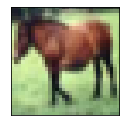

In [9]:
img = X_train[7]
print("Input image shape: {0}".format(img.shape))
fig, ax = plt.subplots(1,1,figsize=(2,2))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(img)
plt.show()

### Get the feature map for the first hidden layer

In [28]:
# we use the predict method of our model with the filters of interest to produce the feature map
feature_map = model.predict(img.reshape(1,32,32,3))
print(feature_map.shape)

(1, 30, 30, 32)


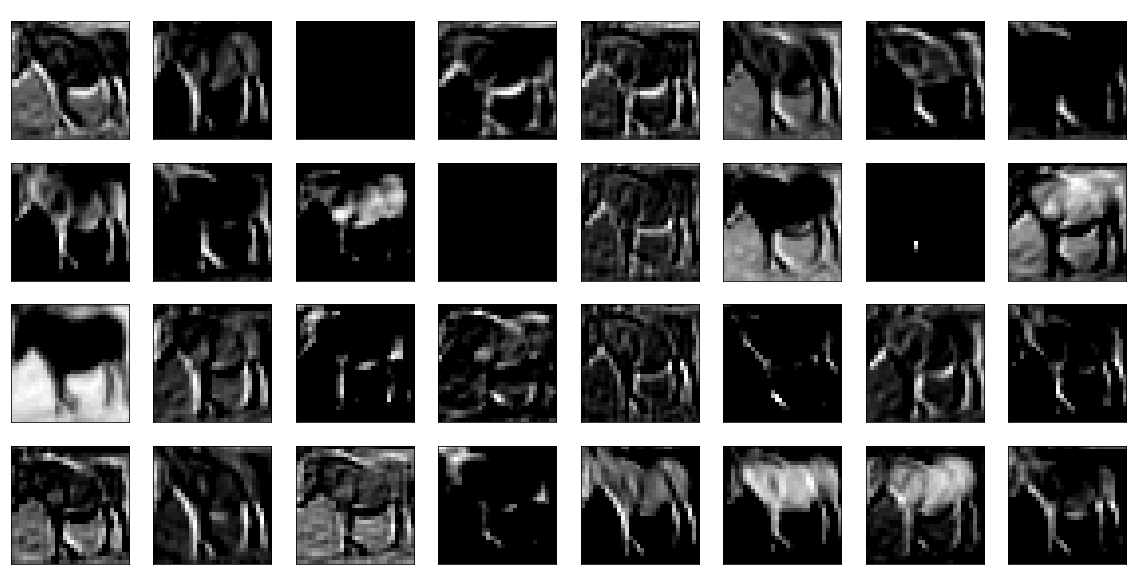

In [29]:
# plot an image per channel
# indexes are shown to locate wich filter produced the feature map
_, h, w, feature_n = feature_map.shape

rows = 4
cols = 8 

fig, axs = plt.subplots(rows,cols,figsize=(20,10))
for i in range(rows):
    for j in range(cols):
        index = (i*cols)+j
        axs[i,j].set_title("Filter:{0}".format(index), c='w',fontsize=10)
        axs[i,j].imshow(feature_map[0,:,:,index], cmap='gray')
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
plt.show()

### Feature map for the second Convolutional Layer

In [93]:
# Redifine model to output right after the first hidden layer
conv_layer_index = 1

model2 = Model(inputs=CNN.inputs, outputs=CNN.layers[conv_layer_index].output)

In [94]:
# we use the predict method of our model with the filters of interest to produce the feature map
feature_map2 = model2.predict(img.reshape(1,32,32,3))
print(feature_map2.shape)

(1, 28, 28, 32)


In [95]:
# indexes are shown to locate wich filter produced the feature map

w, h, d, feature_n = feature_map2.shape

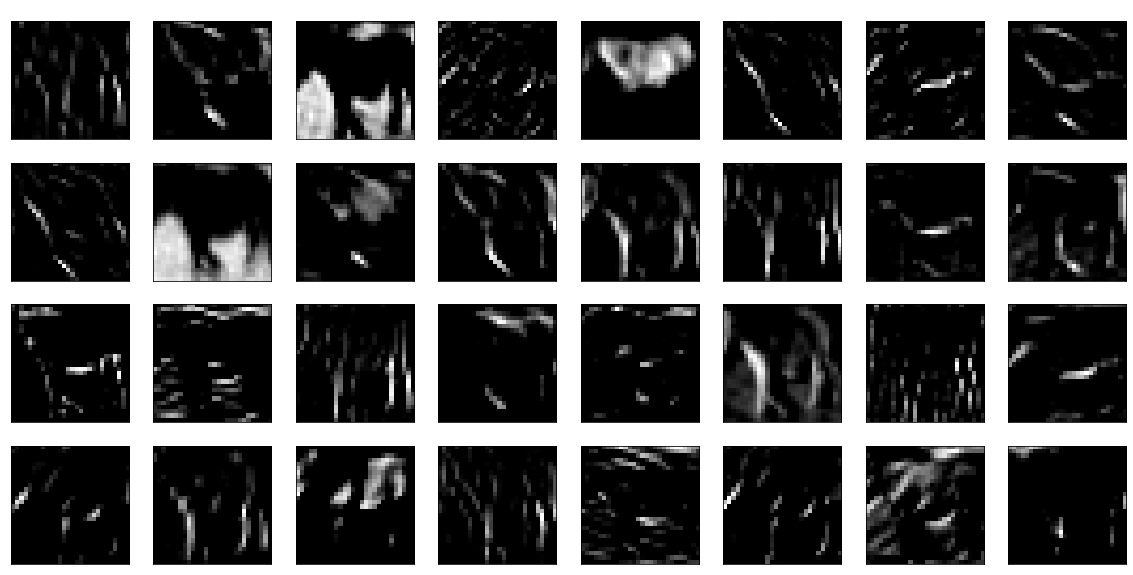

In [96]:
# plot an image per channel

rows = 4
cols = 8 

fig, axs = plt.subplots(rows,cols,figsize=(20,10))
for i in range(rows):
    for j in range(cols):
        index = (i*cols)+j
        axs[i,j].set_title("Filter:{0}".format(index), c='w',fontsize=10)
        axs[i,j].imshow(feature_map2[0,:,:,index], cmap='gray')
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
plt.show()

### Feature map for the third Convolutional Layer

In [98]:
# Redifine model to output right after the first hidden layer
conv_layer_index = 4

model3 = Model(inputs=CNN.inputs, outputs=CNN.layers[conv_layer_index].output)

In [99]:
# we use the predict method of our model with the filters of interest to produce the feature map
feature_map3 = model3.predict(img.reshape(1,32,32,3))
print(feature_map3.shape)

(1, 12, 12, 64)


In [100]:
# indexes are shown to locate wich filter produced the feature map

w, h, d, feature_n = feature_map3.shape

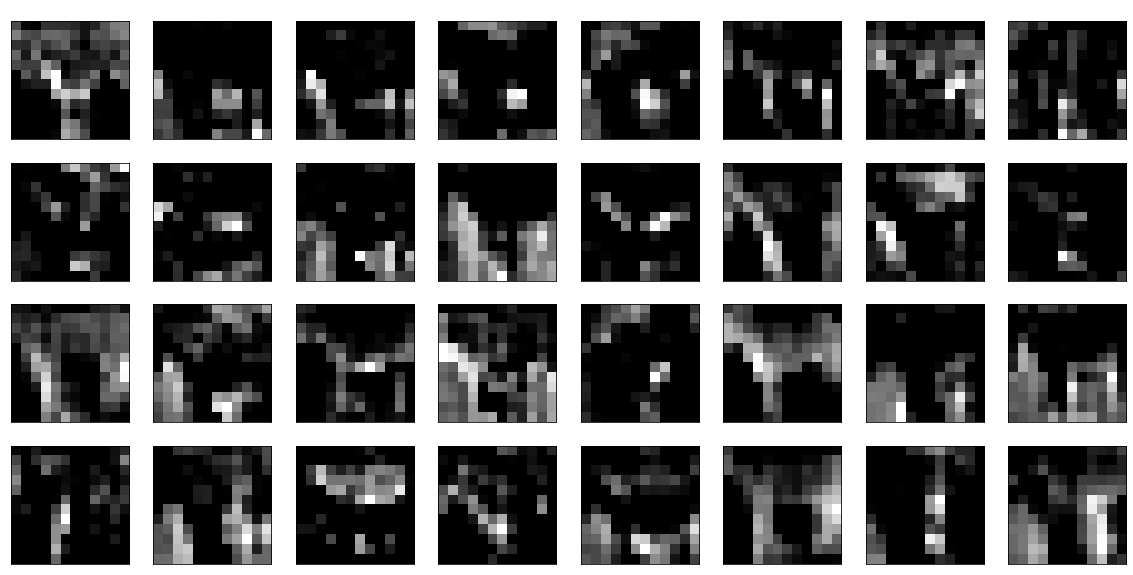

In [101]:
# plot an image per channel

rows = 4
cols = 8 

fig, axs = plt.subplots(rows,cols,figsize=(20,10))
for i in range(rows):
    for j in range(cols):
        index = (i*cols)+j
        axs[i,j].set_title("Filter:{0}".format(index), c='w',fontsize=10)
        axs[i,j].imshow(feature_map3[0,:,:,index], cmap='gray')
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
plt.show()

### Feature map for the Last Convolutional Layer

In [102]:
# Redifine model to output right after the first hidden layer
conv_layer_index = 5

model4 = Model(inputs=CNN.inputs, outputs=CNN.layers[conv_layer_index].output)

In [103]:
# we use the predict method of our model with the filters of interest to produce the feature map
feature_map4 = model4.predict(img.reshape(1,32,32,3))
print(feature_map4.shape)

(1, 10, 10, 64)


In [104]:
# indexes are shown to locate wich filter produced the feature map

w, h, d, feature_n = feature_map4.shape

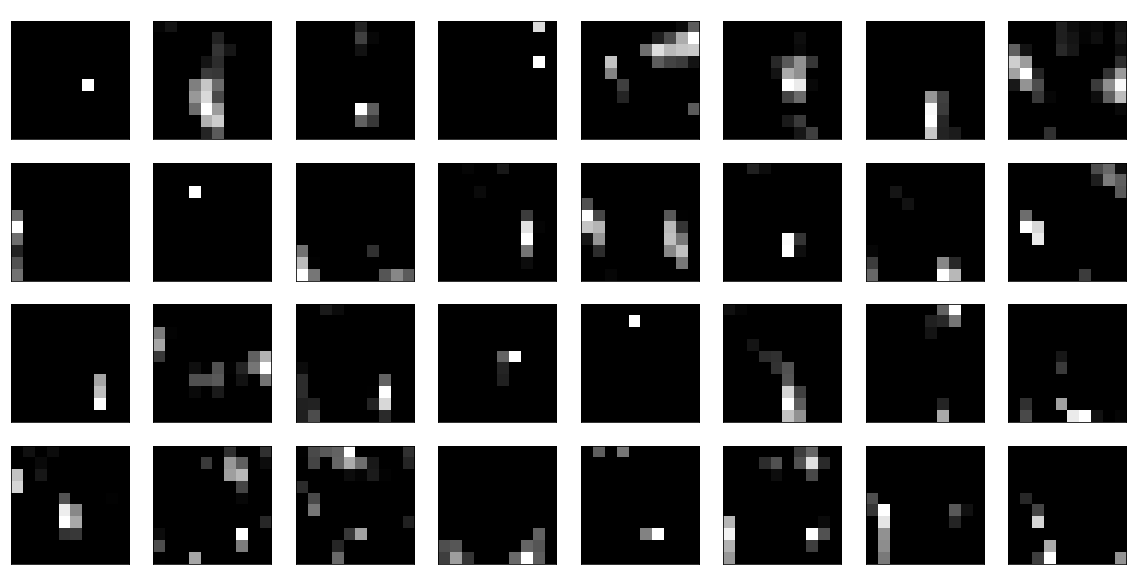

In [105]:
# plot an image per channel

rows = 4
cols = 8 

fig, axs = plt.subplots(rows,cols,figsize=(20,10))
for i in range(rows):
    for j in range(cols):
        index = (i*cols)+j
        axs[i,j].set_title("Filter:{0}".format(index), c='w',fontsize=10)
        axs[i,j].imshow(feature_map4[0,:,:,index], cmap='gray')
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
plt.show()

#### Second Input Image to display and see the feature maps

In [147]:
# Redifine model to output right after the first hidden layer
conv_layer_index = 0

model5 = Model(inputs=CNN.inputs, outputs=CNN.layers[conv_layer_index].output)

Input image shape: (32, 32, 3)


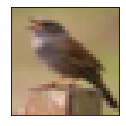

In [148]:
img2 = X_train[560]
print("Input image shape: {0}".format(img2.shape))
fig, ax = plt.subplots(1,1,figsize=(2,2))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(img2)
plt.show()

#30

### Get the feature map for the first Conv. layer

In [149]:
# we use the predict method of our model with the filters of interest to produce the feature map
feature_map5 = model5.predict(img2.reshape(1,32,32,3))
print(feature_map5.shape)

(1, 30, 30, 32)


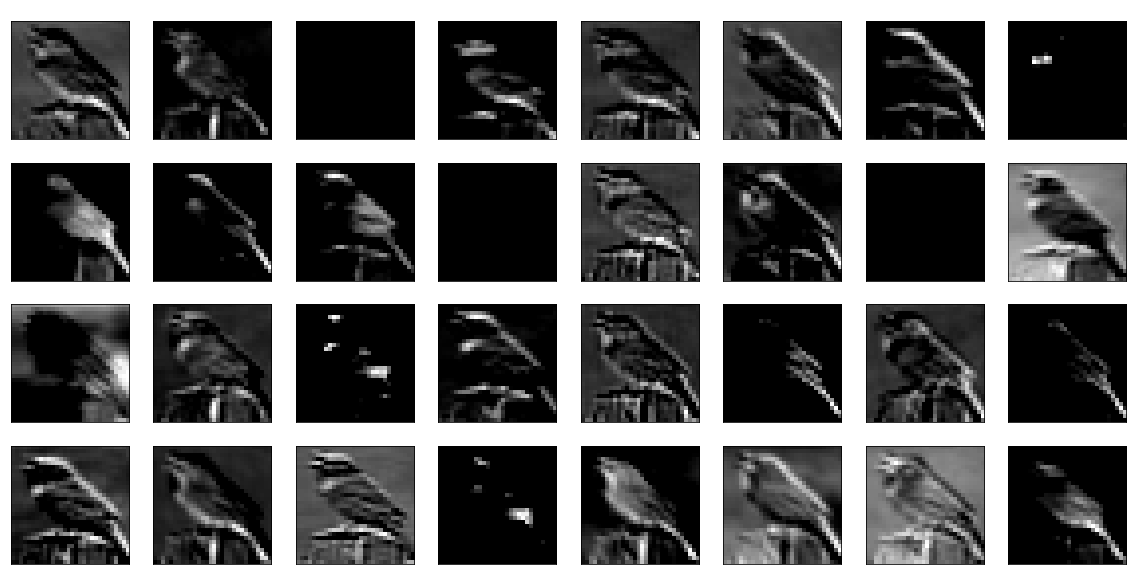

In [150]:
# plot an image per channel
# indexes are shown to locate wich filter produced the feature map
_, h, w, feature_n = feature_map.shape

rows = 4
cols = 8 

fig, axs = plt.subplots(rows,cols,figsize=(20,10))
for i in range(rows):
    for j in range(cols):
        index = (i*cols)+j
        axs[i,j].set_title("Filter:{0}".format(index), c='w',fontsize=10)
        axs[i,j].imshow(feature_map5[0,:,:,index], cmap='gray')
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
plt.show()

### Feature map for the second Convolutional Layer

In [151]:
# Redifine model to output right after the first hidden layer
conv_layer_index = 1

model6 = Model(inputs=CNN.inputs, outputs=CNN.layers[conv_layer_index].output)

In [152]:
# we use the predict method of our model with the filters of interest to produce the feature map
feature_map6 = model6.predict(img2.reshape(1,32,32,3))
print(feature_map6.shape)

(1, 28, 28, 32)


In [153]:
# indexes are shown to locate wich filter produced the feature map

w, h, d, feature_n = feature_map6.shape

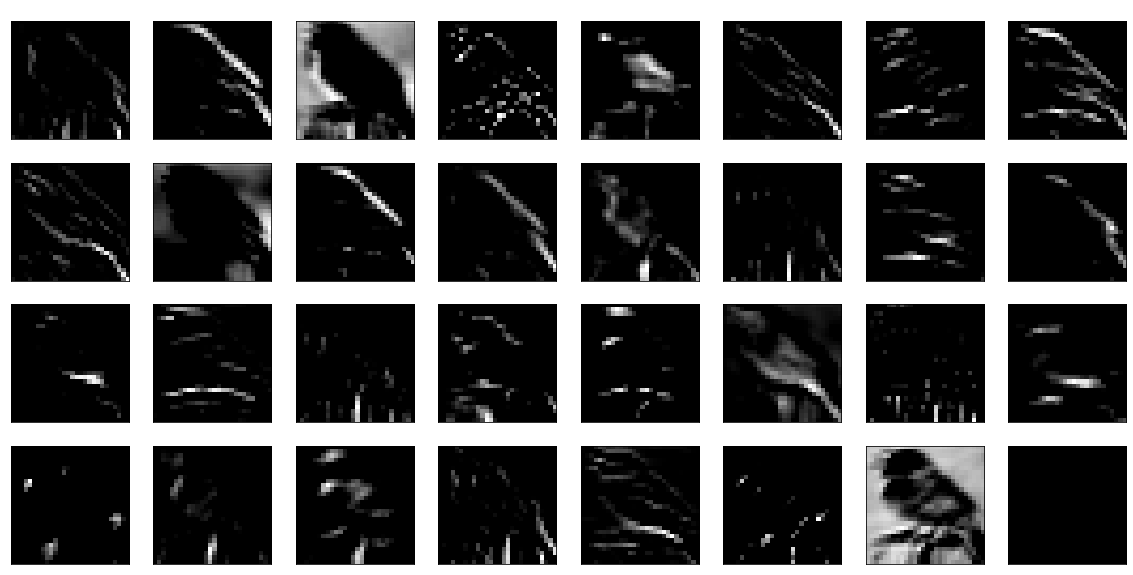

In [154]:
# plot an image per channel

rows = 4
cols = 8 

fig, axs = plt.subplots(rows,cols,figsize=(20,10))
for i in range(rows):
    for j in range(cols):
        index = (i*cols)+j
        axs[i,j].set_title("Filter:{0}".format(index), c='w',fontsize=10)
        axs[i,j].imshow(feature_map6[0,:,:,index], cmap='gray')
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
plt.show()

### Feature map for the third Convolutional Layer

In [155]:
# Redifine model to output right after the first hidden layer
conv_layer_index = 4

model7 = Model(inputs=CNN.inputs, outputs=CNN.layers[conv_layer_index].output)

In [156]:
# we use the predict method of our model with the filters of interest to produce the feature map
feature_map7 = model7.predict(img2.reshape(1,32,32,3))
print(feature_map7.shape)

(1, 12, 12, 64)


In [157]:
# indexes are shown to locate wich filter produced the feature map

w, h, d, feature_n = feature_map7.shape

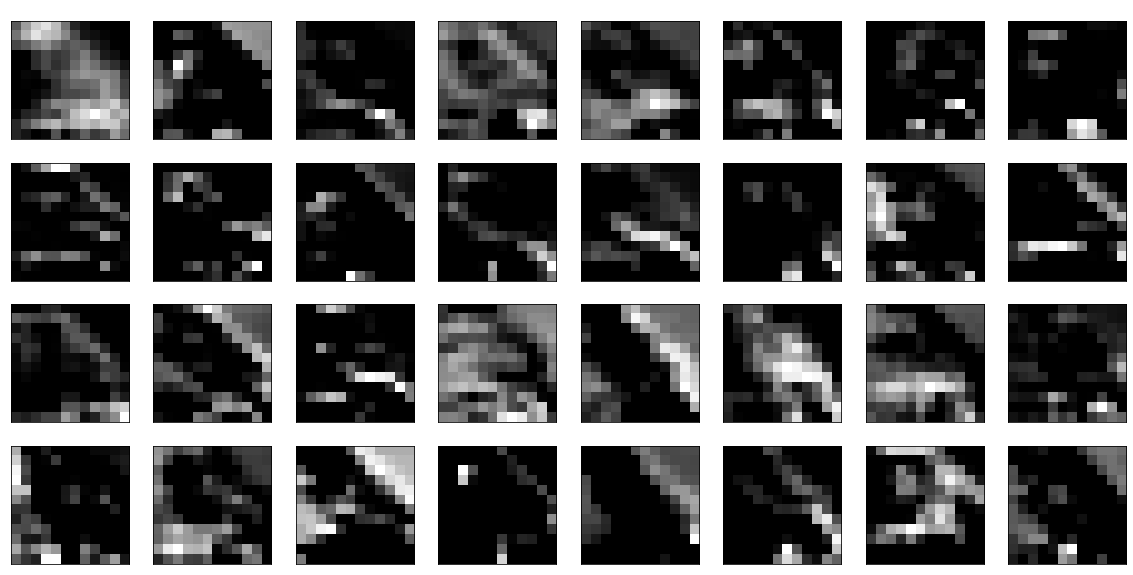

In [158]:
# plot an image per channel

rows = 4
cols = 8 

fig, axs = plt.subplots(rows,cols,figsize=(20,10))
for i in range(rows):
    for j in range(cols):
        index = (i*cols)+j
        axs[i,j].set_title("Filter:{0}".format(index), c='w',fontsize=10)
        axs[i,j].imshow(feature_map7[0,:,:,index], cmap='gray')
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
plt.show()

### Feature map for the Last Convolutional Layer

In [159]:
# Redifine model to output right after the first hidden layer
conv_layer_index = 5

model8 = Model(inputs=CNN.inputs, outputs=CNN.layers[conv_layer_index].output)

In [160]:
# we use the predict method of our model with the filters of interest to produce the feature map
feature_map8 = model8.predict(img2.reshape(1,32,32,3))
print(feature_map8.shape)

(1, 10, 10, 64)


In [161]:
# indexes are shown to locate wich filter produced the feature map

w, h, d, feature_n = feature_map8.shape

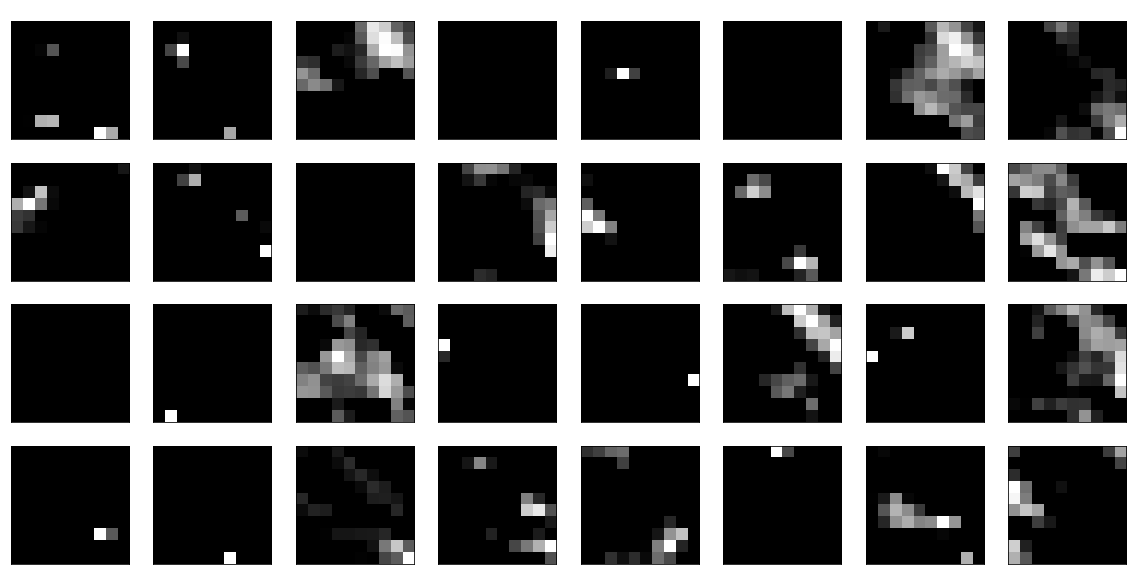

In [162]:
# plot an image per channel

rows = 4
cols = 8 

fig, axs = plt.subplots(rows,cols,figsize=(20,10))
for i in range(rows):
    for j in range(cols):
        index = (i*cols)+j
        axs[i,j].set_title("Filter:{0}".format(index), c='w',fontsize=10)
        axs[i,j].imshow(feature_map8[0,:,:,index], cmap='gray')
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
plt.show()

## Save the Model

In [40]:
# save the model to disk
filenames = 'finalized_model.sav'
joblib.dump(CNN, filenames)

['finalized_model.sav']

In [32]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_modelVF2.h5'

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
CNN.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\rmfer\Desktop\UFM\Semestre 7\Machine learning models\virtual_64\Scripts\saved_models\keras_cifar10_trained_model3.h5 


## Load the Model

In [ ]:
# load the model from disk
#loaded_model = joblib.load(filenames)
#loss, test_a = loaded_model.evaluate(X_test, y_test)
#print(test_a)